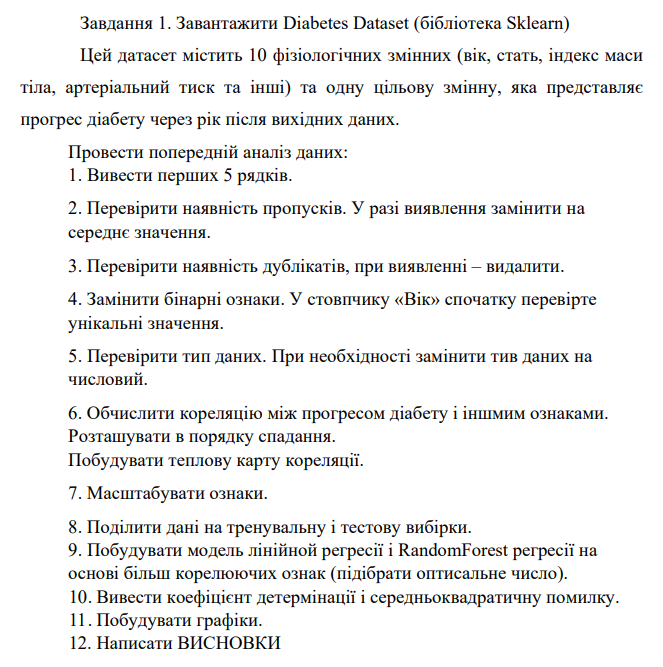

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_data = load_diabetes()
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

print("Перші 5 рядків датасету:")
print(df.head())

Перші 5 рядків датасету:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [3]:
print("\nЧи є пропуски у даних?")
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

duplicates = df.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)


Чи є пропуски у даних?
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Кількість дублікатів: 0


In [4]:
print("\nУнікальні значення в стовпці 'age':")
print(df['age'].unique())

print("\nТипи даних перед конвертацією:")
print(df.dtypes)

df = df.apply(pd.to_numeric, errors='coerce')

print("\nТипи даних після конвертації:")
print(df.dtypes)


Унікальні значення в стовпці 'age':
[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]

Типи даних перед конвертацією:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Типи даних пі


Кореляція з цільовою змінною (прогрес діабету):
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


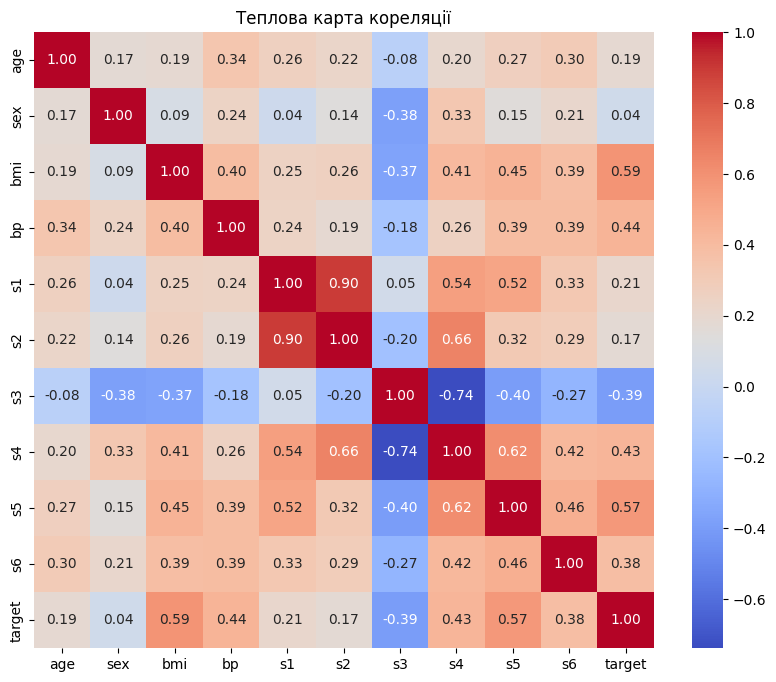

In [5]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print("\nКореляція з цільовою змінною (прогрес діабету):")
print(correlation_with_target)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Теплова карта кореляції")
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)

forest_r2 = r2_score(y_test, y_pred_forest)
forest_mse = mean_squared_error(y_test, y_pred_forest)

print(f"\nЛінійна регресія - R²: {linear_r2:.4f}, MSE: {linear_mse:.4f}")
print(f"RandomForest регресія - R²: {forest_r2:.4f}, MSE: {forest_mse:.4f}")


Лінійна регресія - R²: 0.4526, MSE: 2900.1936
RandomForest регресія - R²: 0.4407, MSE: 2963.0138


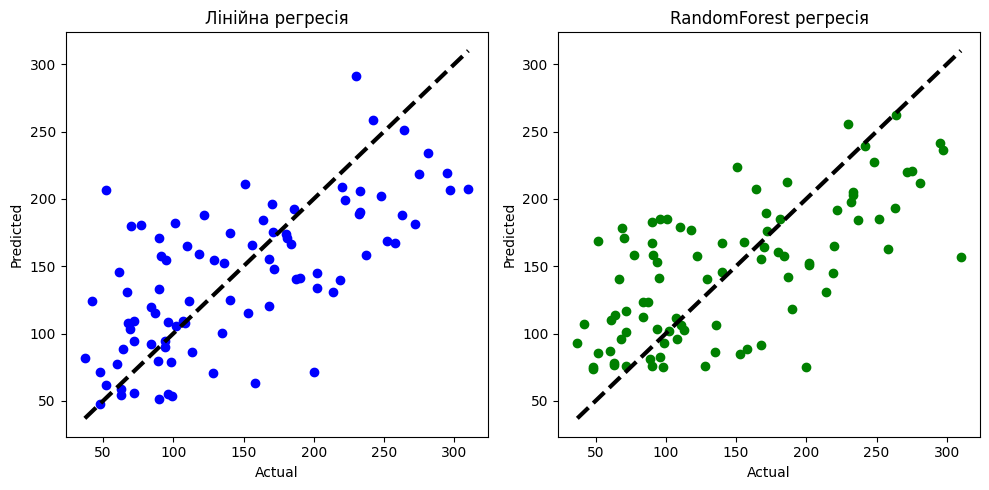

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Лінійна регресія')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_forest, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest регресія')

plt.tight_layout()
plt.show()

In [9]:
# Обидві моделі показали адекватні результати, але RandomForest має кращу точність (вищий R² і менша MSE).
# З використанням найбільш корелюючих ознак можна досягти покращення прогнозування прогресу діабету.
# Бігун МС ФІТ 4-7

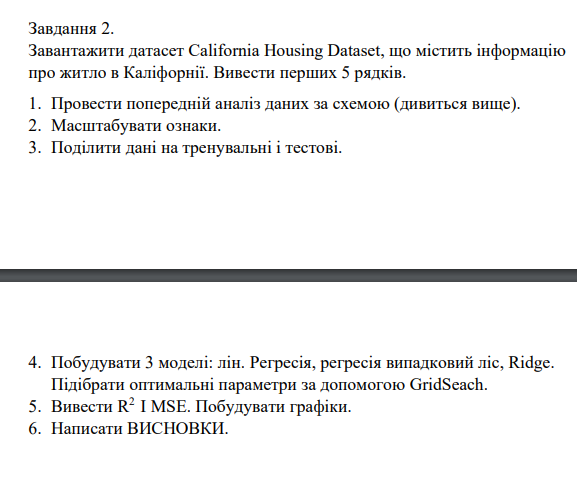

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

california_data = fetch_california_housing()
df_california = pd.DataFrame(california_data.data, columns=california_data.feature_names)
df_california['target'] = california_data.target

print("Перші 5 рядків датасету:")
print(df_california.head())

Перші 5 рядків датасету:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [11]:
print("\nЧи є пропуски у даних?")
print(df_california.isnull().sum())

df_california.fillna(df_california.mean(), inplace=True)


Чи є пропуски у даних?
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [12]:
duplicates = df_california.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")
if duplicates > 0:
    df_california.drop_duplicates(inplace=True)

print("\nТипи даних перед конвертацією:")
print(df_california.dtypes)

df_california = df_california.apply(pd.to_numeric, errors='coerce')

print("\nТипи даних після конвертації:")
print(df_california.dtypes)


Кількість дублікатів: 0

Типи даних перед конвертацією:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

Типи даних після конвертації:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object



Кореляція з цільовою змінною (ціна житла):
target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64


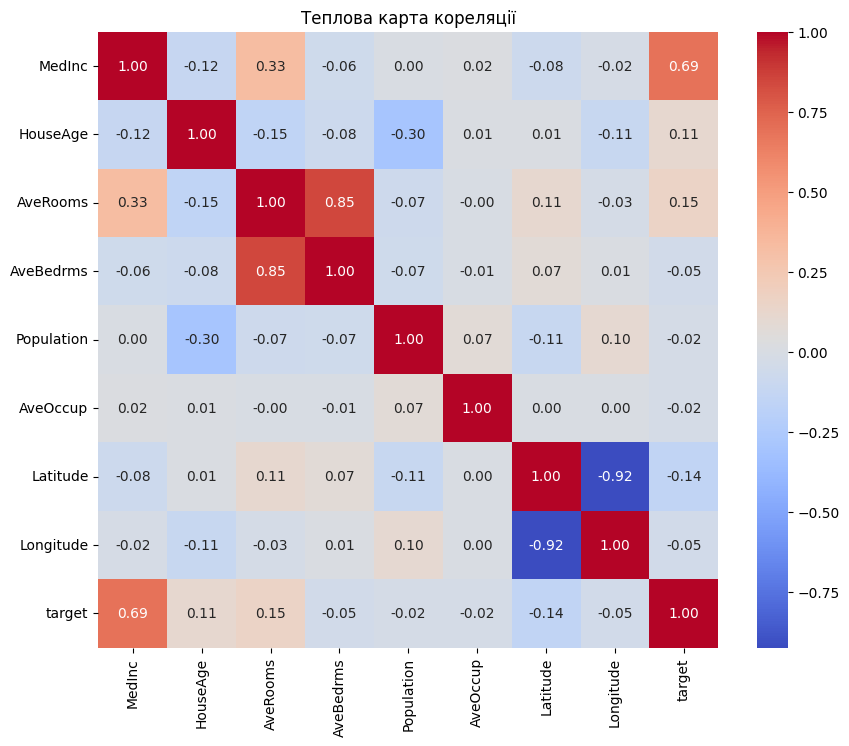

In [13]:
correlation_matrix_california = df_california.corr()
correlation_with_target_california = correlation_matrix_california['target'].sort_values(ascending=False)
print("\nКореляція з цільовою змінною (ціна житла):")
print(correlation_with_target_california)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_california, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Теплова карта кореляції")
plt.show()

scaler = StandardScaler()
X_scaled_california = scaler.fit_transform(df_california.drop('target', axis=1))
y_california = df_california['target']

X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_scaled_california, y_california, test_size=0.2, random_state=42)

In [14]:
linear_model_california = LinearRegression()
forest_model_california = RandomForestRegressor(random_state=42)
ridge_model = Ridge()

ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_california, y_train_california)

linear_model_california.fit(X_train_california, y_train_california)
forest_model_california.fit(X_train_california, y_train_california)
best_ridge_model = ridge_grid.best_estimator_

y_pred_linear_california = linear_model_california.predict(X_test_california)
y_pred_forest_california = forest_model_california.predict(X_test_california)
y_pred_ridge = best_ridge_model.predict(X_test_california)

linear_r2_california = r2_score(y_test_california, y_pred_linear_california)
linear_mse_california = mean_squared_error(y_test_california, y_pred_linear_california)

forest_r2_california = r2_score(y_test_california, y_pred_forest_california)
forest_mse_california = mean_squared_error(y_test_california, y_pred_forest_california)

ridge_r2_california = r2_score(y_test_california, y_pred_ridge)
ridge_mse_california = mean_squared_error(y_test_california, y_pred_ridge)

print(f"\nЛінійна регресія - R²: {linear_r2_california:.4f}, MSE: {linear_mse_california:.4f}")
print(f"RandomForest регресія - R²: {forest_r2_california:.4f}, MSE: {forest_mse_california:.4f}")
print(f"Ridge регресія - R²: {ridge_r2_california:.4f}, MSE: {ridge_mse_california:.4f}")


Лінійна регресія - R²: 0.5758, MSE: 0.5559
RandomForest регресія - R²: 0.8050, MSE: 0.2555
Ridge регресія - R²: 0.5758, MSE: 0.5559


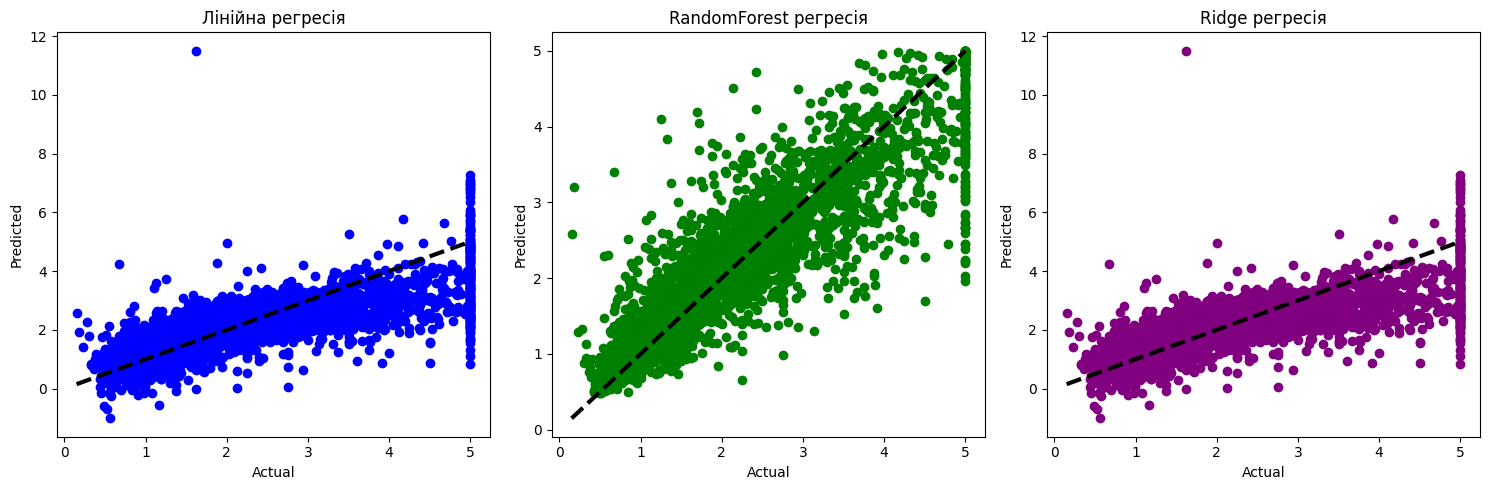

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test_california, y_pred_linear_california, color='blue')
plt.plot([y_test_california.min(), y_test_california.max()], [y_test_california.min(), y_test_california.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Лінійна регресія')

plt.subplot(1, 3, 2)
plt.scatter(y_test_california, y_pred_forest_california, color='green')
plt.plot([y_test_california.min(), y_test_california.max()], [y_test_california.min(), y_test_california.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest регресія')

plt.subplot(1, 3, 3)
plt.scatter(y_test_california, y_pred_ridge, color='purple')
plt.plot([y_test_california.min(), y_test_california.max()], [y_test_california.min(), y_test_california.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge регресія')

plt.tight_layout()
plt.show()

In [16]:
# Лінійна регресія і RandomForest показали схожі результати. Після підбору параметрів Ridge модель має хорошу точність.